# Lab 6: Graphs II

Lab associated with Module 6: Graphs II

***

In [1]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

***

### Section 0: Imports

In [2]:
import numpy as np

In [3]:
import math

In [4]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Graph Preliminaries

Let us start by implementing our Node and Graph data structure to incorporate weights in the graph

In [5]:
class Node:
    
    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        
        #Adrian's suggestion:
        self.parent = None
        
        self.status = "unvisited"
        self.estD = np.inf
        
    def hasOutNeighbor(self, v):
        
        if v in self.outNeighbors:
            return True
        
        return False
        
    def hasInNeighbor(self, v):
        
        if v in self.inNeighbors:
            return True
        
        return False
    
    def hasNeighbor(self, v):
        
        if v in self.inNeighbors or v in self.outNeighbors:
            return True
        
        return False
    
    def getOutNeighbors(self):
        
        return self.outNeighbors
    
    def getInNeighbors(self):
        
        return self.inNeighbors
    
    def getOutNeighborsWithWeights(self):
        
        return self.outNeighbors
    
    def getInNeighborsWithWeights(self):
        
        return self.inNeighbors
    
    # ------------------------------------------------
    # Let us modify following two functions to incorporate weights
    # ------------------------------------------------
    
    def addOutNeighbor(self,v,wt):
        
        self.outNeighbors.append((v,wt))
    
    def addInNeighbor(self,v,wt):
        
        self.inNeighbors.append((v,wt))
        
        
    def __str__(self):
        
        return str(self.value) 

In [6]:
class Graph:
    
    def __init__(self):
        
        self.vertices = []

    def addVertex(self,n):
        
        self.vertices.append(n)
        
    # ------------------------------------------------
    # Let us modify following two functions to incorporate weights
    # ------------------------------------------------
        
    def addDiEdge(self, u, v, wt = 1):
        
        u.addOutNeighbor(v, wt = wt)
        v.addInNeighbor(u, wt = wt)
        
    # add edges in both directions between u and v
    def addBiEdge(self, u, v, wt = 1):
        
        self.addDiEdge(u, v, wt = wt)
        self.addDiEdge(v, u, wt = wt)
        
            
    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):
        
        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret
    
    # reverse the edge between u and v.  Multiple edges are not supported.
    def reverseEdge(self,u,v):
        
        if u.hasOutNeighbor(v) and v.hasInNeighbor(u):
            
            if v.hasOutNeighbor(u) and u.hasInNeighbor(v): 
                return
        
            self.addDiEdge(v, u)
            u.outNeighbors.remove(v)
            v.inNeighbors.remove(u)        
                
    def __str__(self):
        
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b in self.getDirEdges():
            ret += "(" + str(a) + "," + str(b) + ") "
        ret += "\n"
        return ret

Now that we have incorporated the weights, let us devise a plan to generate the graph

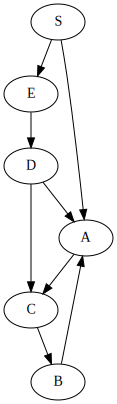

In [7]:
dot = Digraph()

dot.edge('S', 'E')
dot.edge('S', 'A')
dot.edge('E', 'D')
dot.edge('D', 'A')
dot.edge('A', 'C')
dot.edge('B', 'A')
dot.edge('D', 'C')
dot.edge('C', 'B')

#dot.view()
dot

In [8]:
G = Graph()
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['S', 'E', 'A', 'D', 'B', 'C']:
    G.addVertex( Node(i) )

In [9]:
V = G.vertices

#dot.edge('S', 'E')
G.addDiEdge( V[0], V[1], 8)

#dot.edge('S', 'A')
G.addDiEdge( V[0], V[2] , 10)

#dot.edge('E', 'D')
G.addDiEdge( V[1], V[3], 1)

#dot.edge('D', 'A')
G.addDiEdge( V[3], V[2], -4)

#dot.edge('A', 'C')
G.addDiEdge( V[2], V[5], 2)

#dot.edge('B', 'A')
G.addDiEdge( V[4], V[2], 1 )

#dot.edge('D', 'C')
G.addDiEdge( V[3], V[5], -1)

#dot.edge('C', 'B')
G.addDiEdge( V[5], V[4], -2 )

Second Example

In [10]:
G = Graph()
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['S', 'A', 'B']:
    G.addVertex( Node(i) )
    
V = G.vertices

G.addDiEdge( V[0], V[1], 3)

G.addDiEdge( V[0], V[2] , 4)

G.addDiEdge( V[2], V[1], -2)

In [11]:
print(G)

Graph with:
	 Vertices:
	S,A,B,
	 Edges:
	(S,(<__main__.Node object at 0x000001EE13B049D0>, 3)) (S,(<__main__.Node object at 0x000001EE13B04EB0>, 4)) (B,(<__main__.Node object at 0x000001EE13B049D0>, -2)) 



***

### Section 2: Dijkstra Algorithm

In [12]:
len(G.vertices)

3

In [13]:
def dijkstra(w, G):
    
    for v in G.vertices:
        v.estD = math.inf
        
    w.estD = 0
    unsureVertices = G.vertices[:]
    
    sureVertices = []
    
    #Nayyar suggestion: parents = [None for i in len(G.vertices)] 
    #Adrian's suggestion: 
    for i in len(G.vertices):
        G.vertices.index(i).parent = None
    # Jamie's solution: Keep a stack as local variable
    
    while len(unsureVertices) > 0:
    
        # find the u with the minimum estD in the dumbest way possible
        u = None
        minD = math.inf
        for x in unsureVertices:
            if x.estD < minD:
                minD = x.estD
                u = x
        
        if u == None:
            # then there is nothing more that I can reach
            return
        
        # update u's neighbors
        for v, wt in u.getOutNeighborsWithWeights():
            
            if v in sureVertices:
                continue
            
            if u.estD + wt < v.estD:
                v.estD = u.estD + wt
                
                #Nayyar's solution: parents[G.vertices.index(v)] = G.vertices.index(u)
                #Adrian's solution: 
                v.parent = u
        
        unsureVertices.remove(u)
        sureVertices.append(u)
    
    # that's it!  Now each vertex holds estD which is its distance from w

In [14]:
w = G.vertices[0]
dijkstra(w, G)

for v in G.vertices:
    print(v.value, v.estD)

TypeError: 'int' object is not iterable

In [15]:
current = T
path = []
while (current != S):
    path.append(current)
    current = current.parent
    

NameError: name 'T' is not defined

***

### <font color='red'> Activity 1: Modify above code to do Bellman-Ford. Make sure you test for negative cycles and compare its performance with Dijkstra. </font>

In [16]:
#### TODO ####
### Good Luck ###

def Bellman(w, G):
    
    for v in G.vertices:
        v.estD = math.inf
        
    w.estD = 0    
    
    for i in range(0, len(G.vertices)):
        
        for u in range(0, len(G.vertices)):
    
        
            if u == None:
                # then there is nothing more that I can reach
                return
        
            # update u's neighbors
            for v, wt in u.getOutNeighborsWithWeights():

                if u.estD + wt < v.estD:
                    v.estD = u.estD + wt
                    
                    
            v_final = v
            
                
    # Check for Negative Cycles

    # ----------
    # update u's neighbors
    for v, wt in u.getOutNeighborsWithWeights():


        if u.estD + wt < v.estD:
            v.estD = u.estD + wt

        if v_final != v:
            print('There are negative cycles')
        





***

### <font color='red'> Activity 2: Implement Floyd-Warshal algorithm using above data structure (that is Node and Graph). Make sure to test all the use-cases. </font>

In [17]:
#### TODO ####
### Good Luck ###


# Part 1: (Initialzation of your D matrix)

n = len(G.vertices)
distance = [[] for i in range(0,n)]
distance = np.zeros(n, n)
np.fill(np.inf)
np.fill.diagonal(0)

parents = [[] for i in range(0,n)]
parents = np.zeros(n, n)


for u in range(0, n):
    for v, wt in u.getOutNeighborsWithWeights():
        distance[G.vertices.index(u),G.vertices.index(v)] = wt


# Part 2: (Use of DP to solve the problem)

for u in range(0, n):
    
    for u in range(0, n):
        
        for u in range(0, n):
            
            # Implementing/Writing the Floyd Warshall's DP equation
            
            # Update the Parents matrix 


# Part 3: Determine if there are negative cycles

# Loop over the values of Distance and see if any one of them < 0
if distance < 0:
    


# Part 4: Print out the Path


    






IndentationError: expected an indented block (1971439773.py, line 38)

***

***